# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data.head()

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

<Axes: xlabel='Age', ylabel='Tardies'>

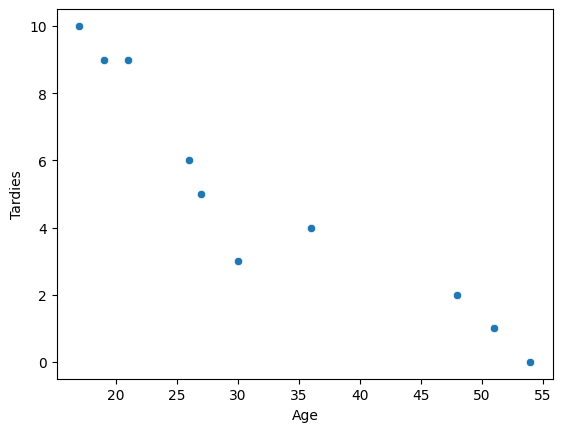

In [8]:
sns.scatterplot(x = student_data["Age"], y = student_data["Tardies"])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [9]:
"""
bro, that 17yo.... be living in Valencia for sure.
There seems to be a negative relation between the two variables in that the older (higher the age) the student, the less (lower)
number of tardies this person entails. The other way around: youger students are late more often so the trendline
would have a negative slope.
"""

'\nbro, that 17yo.... be living in Valencia for sure.\nThere seems to be a negative relation between the two variables in that the older (higher the age) the student, the less (lower)\nnumber of tardies this person entails. The other way around: youger students are late more often so the trendline\nwould have a negative slope.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [10]:
#the correlation:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [11]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [12]:
#my comments:
"""
indeed the signal for both measures is negative representing an inverse relation between them.
The covariance gives a magnitude that's hardly interpretable (what does -45 tell me? What's the scale?)
This is where correlation comes in handy because, by varying between -1 < corr < 1 I get to know wheter the vars
are heavily or lightly correlated. In this case since the value is close to -1 I'd say highly, negatively correlated.
"""

"\nindeed the signal for both measures is negative representing an inverse relation between them.\nThe covariance gives a magnitude that's hardly interpretable (what does -45 tell me? What's the scale?)\nThis is where correlation comes in handy because, by varying between -1 < corr < 1 I get to know wheter the vars\nare heavily or lightly correlated. In this case since the value is close to -1 I'd say highly, negatively correlated.\n"

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [23]:
# since the imaginary line in my head intercepts Y-axis in around 11, that's gonna be my n (intercept)
intercept = 11
# the slope, well if 55y equates to 1 tardiness and I still have to add the 11 on top of this, slope*55 gotta be around -10/55(?)
slope = -(10/55)

student_data["prediction_1"] = slope * student_data.Age + intercept
student_data.sample(4)

,Age,Tardies,prediction_1
4,36,4,4.454545
8,54,0,1.181818
0,17,10,7.909091
9,30,3,5.545455


In [15]:
#not too bad hum?

Plot your regression model on your scatter plot.

,Age,Tardies,prediction_1
0,17,10,7.909091
1,51,1,1.727273
2,27,5,6.090909
3,21,9,7.181818
4,36,4,4.454545
5,48,2,2.272727
6,19,9,7.545455
7,26,6,6.272727
8,54,0,1.181818
9,30,3,5.545455


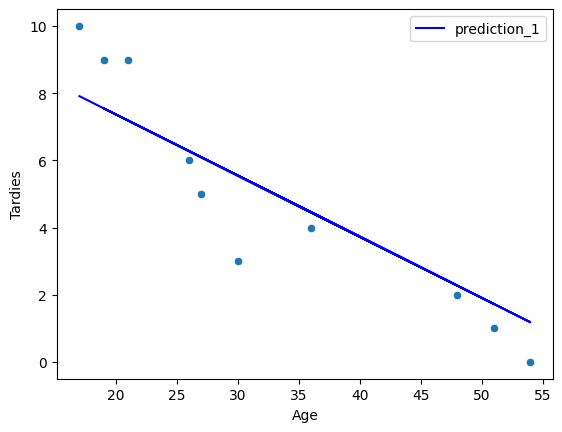

In [25]:
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"])
plt.plot(student_data.Age,student_data.prediction_1, c="blue", label="prediction_1")
plt.legend();
student_data

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

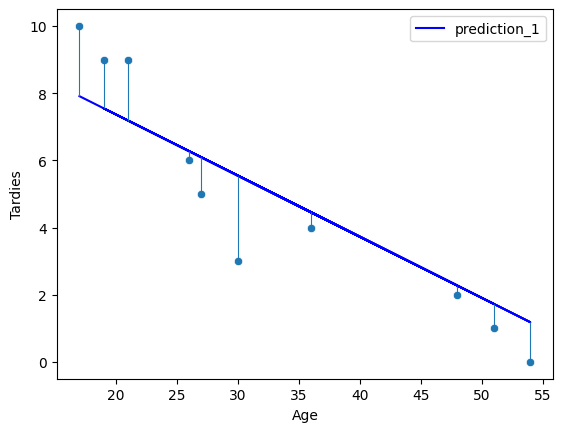

In [28]:
"""
well, I can only say my model looks sweet AF. Just look at this beauty.
Just f*cking look at the residuals. OMG so minimal! Still I think we can improve this biatch. 
"""
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"])
plt.plot(student_data.Age,student_data.prediction_1, c="blue", label="prediction_1")
plt.vlines(student_data.Age,  student_data.prediction_1, student_data.Tardies,lw=0.8)
plt.legend();


In [36]:
#let's try to find the actual optimal equation:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn
lr = LinearRegression()

X = student_data[["Age"]]
y = student_data.Tardies

lr.fit(X, y) 

#what are my my: slope and intercept?
slope2 = lr.coef_
intercept2 = lr.intercept_

print(f"slope = {slope2} and intercept = {intercept2}")

slope = [-0.24282077] and intercept = 12.888803363135771


In [38]:
student_data["prediction_2"] = intercept2 + student_data["Age"]*slope2
student_data

,Age,Tardies,prediction_1,prediction_2
0,17,10,7.909091,8.760850
1,51,1,1.727273,0.504944
2,27,5,6.090909,6.332643
3,21,9,7.181818,7.789567
4,36,4,4.454545,4.147256
5,48,2,2.272727,1.233406
6,19,9,7.545455,8.275209
7,26,6,6.272727,6.575463
8,54,0,1.181818,-0.223518
9,30,3,5.545455,5.604180


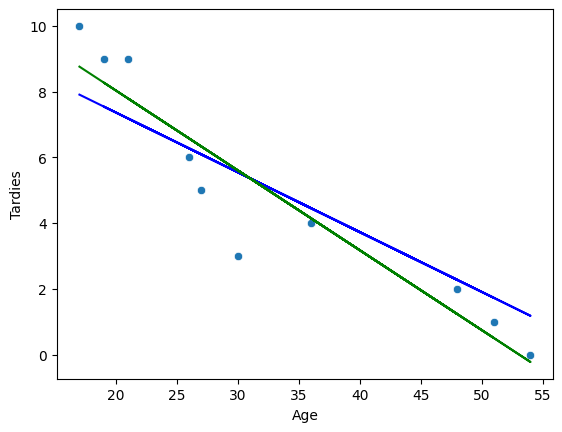

In [40]:
#Is our second model better?
sns.scatterplot(x=student_data["Age"],y=student_data["Tardies"])
plt.plot(student_data.Age,student_data.prediction_1,c="blue",label="prediction_1")
plt.plot(student_data.Age,student_data.prediction_2,c="green",label="prediction_2")

In [41]:
#well this second linear regression model looks better, but you know what? It can go **** itself in the *** cause
#machines might be better than me at computing maths but at least I have feelings, take this, suckers.


#fun trivia for whoever reads this: found out about this contemporary art piece called "can't help myself" by sun yuan peng yu
#and I totally recommend you explore it if you wanna cry over the feelings of a robot.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [44]:
vehicles_dataframe = pd.read_csv("vehicles.csv")
vehicles_dataframe.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [46]:
#first cleanin up this friend:
cleaned_vehicles = vehicles_dataframe.drop(columns=["Model","Engine Displacement","Transmission","Drivetrain","Vehicle Class","Fuel Type","City MPG","Highway MPG"])
cleaned_vehicles.head()

,Make,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,1984,4.0,19.388824,17,522.764706,1950
1,AM General,1984,6.0,25.354615,13,683.615385,2550
2,AM General,1985,4.0,20.600625,16,555.437500,2100
3,AM General,1985,6.0,25.354615,13,683.615385,2550
4,ASC Incorporated,1987,6.0,20.600625,16,555.437500,2550


In [62]:
correlation_vars = ["Year","Cylinders","Fuel Barrels/Year","Combined MPG","CO2 Emission Grams/Mile","Fuel Cost/Year"]
corr_matrix = cleaned_vehicles[correlation_vars].corr()
corr_matrix

#cleaned_vehicles["Year"].corr(cleaned_vehicles["Cylinders"])

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


In [64]:
#mis comments:
"""
looking at the correlation matrix, I see both Fuel Barrels/Year and Fuel Cost/Year having a huge correlation with 
CO2 Emission Grams/Mile so I expect these to be very significant in explaining it. On the other end of the spectrum
I'd place the year (with a correlation of -0.222300). Which still sounds about right - more recent cars polut less(?)
"""

"\nlooking at the correlation matrix, I see both Fuel Barrels/Year and Fuel Cost/Year having a huge correlation with \nCO2 Emission Grams/Mile so I expect these to be very significant in explaining it. On the other end of the spectrum\nI'd place the year (with a correlation of -0.222300). Which still sounds about right - more recent cars polut less(?)\n"

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [67]:
# first we need to define X and y (X as a compleau of columns being a Df and y, lower case being a series):
X = cleaned_vehicles[["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year"]]
y = cleaned_vehicles["CO2 Emission Grams/Mile"]

#now let's choose a mode: lr
lr2 = LinearRegression() #2 because we had one already in the previous exercise

#let's fit this:
lr2.fit(X, y)

#what be tha metricz?
lr2.intercept_
lr2.coef_ 

#coeffs will be:
"""
["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year"]
respectively:
[-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948]
"""

'\n["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year"]\nrespectively:\n[-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948]\n'

#### MY comments:

We're talking about a multiple linear regression model where we use several factors to try to explain another one:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_2 X_m + \epsilon$$

In [74]:
#the results:
#results = smf.ols("CO2 Emission Grams/Mile ~ Year + Cylinders + Fuel Barrels/Year + Combined MPG + `Fuel Cost/Year`", data = cleaned_vehicles).fit()
results = smf.ols("Q('CO2 Emission Grams/Mile') ~ Year + Cylinders + Q('Fuel Barrels/Year') + Q('Combined MPG') + Q('Fuel Cost/Year')", data=cleaned_vehicles).fit()

#note - due to the name of the column "Fuel Cost/Year" the first line was not working


#let's print it:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Q('CO2 Emission Grams/Mile')   R-squared:                       0.981
Model:                                      OLS   Adj. R-squared:                  0.981
Method:                           Least Squares   F-statistic:                 3.687e+05
Date:                          Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                                  16:43:15   Log-Likelihood:            -1.5173e+05
No. Observations:                         35952   AIC:                         3.035e+05
Df Residuals:                             35946   BIC:                         3.035e+05
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                769.8883     19.392     39.702      0.000     731.880     807.897
Year                      -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders                  1.8788      0.083     22.598      0.000       1.716       2.042
Q('Fuel Barrels/Year')    19.0529      0.061    311.600      0.000      18.933      19.173
Q('Combined MPG')         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Q('Fuel Cost/Year')        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
"""
well, so first thing to notice is the really high 0.981 R-Squared which tells us that 98.1% of the variance in our model can be explained 
by these variables (WOAH, I which we could have such a model for the stock market, I'd be making so many commas).
Then, relevant to say that apparently all the variables explain, significantly (P_value>0.05) the CO2 Emission Grams/Mile.
The Year and milleage per gallon, as expected impact negatively the result (y) for the dependent variable, makes sense because:
the more recent the cars, as mentioned, the less polution they cause and the better the autonomy with one tank, the less they're consuming,
the more efficient they are --> the less they polute.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [102]:
party_attendance = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
party_attendance.head()

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [110]:
lr3 = LinearRegression()
X = party_attendance[["X"]]
y = party_attendance.Y
lr3.fit(X, y)
prediction_attendance_coef = lr3.coef_
prediction_attendance_intercept = lr3.intercept_

party_attendance["prediction_attendance"] = party_attendance["X"]*prediction_attendance_coef+ prediction_attendance_intercept
party_attendance

,X,Y,prediction_attendance
0,1,1,0.409091
1,3,2,2.106061
2,4,4,2.954545
3,6,4,4.651515
4,8,5,6.348485
5,9,7,7.196970
6,11,8,8.893939
7,14,13,11.439394


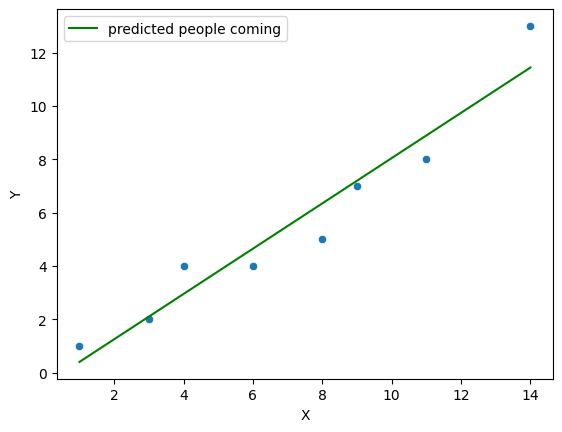

In [84]:
sns.scatterplot(x=party_attendance["X"],y=party_attendance["Y"])
plt.plot(party_attendance.X,party_attendance.prediction_attendance,c="green",label="predicted people coming")
plt.legend();

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [86]:
print("indeed there is a positive correlation between the two, as in, the more people you invite, the more people come to the party (we're not talking exponentially, like at some point you invite 10 and 12 attend, no because Y is always <=X) but still a positive correlation.")

indeed there is a positive correlation between the two, as in, the more people you invite, the more people come to the party (we're not talking exponentially, like at some point you invite 10 and 12 attend, no because Y is always <=X) but still a positive correlation.


In [117]:
results_attendance = smf.ols("X ~ prediction_attendance", data = party_attendance).fit()
results_attendance.summary()

C:\Users\mocid\miniconda3\envs\ironhack_5\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.512e+31
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.35e-94
Time:                        17:26:27   Log-Likelihood:                 261.82
No. Observations:                   8   AIC:                            -519.6
Df Residuals:                       6   BIC:                            -519.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.5179   1.14e-15   4.55e+14      0.000       0.518       0.518
prediction_attendance     1.1786   1.75e-16   6.72e+15      0.000       1.179       1.179
==============================================================================
Omnibus:                        2.013   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                1.170
Skew:                          -0.717   Prob(JB):                        0.557
Kurtosis:                       1.794   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
#BOOM R^2 = 1. Let's go.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

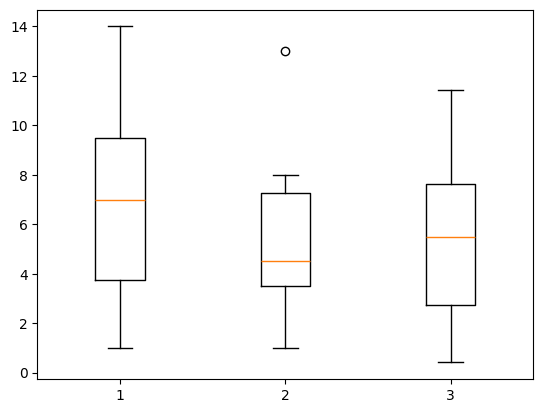

In [95]:
plt.boxplot(party_attendance)
plt.show()

In [107]:
print("yes, so the outlier is the 13")
party_attendance_no_outliers = party_attendance.drop(party_attendance[party_attendance['X'] == 14].index)
party_attendance_no_outliers

yes, so the outlier is the 13


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [108]:
lr4 = LinearRegression()
X = party_attendance_no_outliers[["X"]]
y = party_attendance_no_outliers.Y
lr4.fit(X, y)
prediction_attendance_no_outs_coef = lr4.coef_
prediction_attendance_no_outs_intercept = lr4.intercept_

party_attendance_no_outliers["prediction_attendance"] = party_attendance_no_outliers["X"]*prediction_attendance_no_outs_coef+ prediction_attendance_no_outs_intercept
party_attendance_no_outliers

,X,Y,prediction_attendance
0,1,1,1.007519
1,3,2,2.375940
2,4,4,3.060150
3,6,4,4.428571
4,8,5,5.796992
5,9,7,6.481203
6,11,8,7.849624


In [112]:
#the previous one:
party_attendance

,X,Y,prediction_attendance
0,1,1,0.409091
1,3,2,2.106061
2,4,4,2.954545
3,6,4,4.651515
4,8,5,6.348485
5,9,7,7.196970
6,11,8,8.893939
7,14,13,11.439394


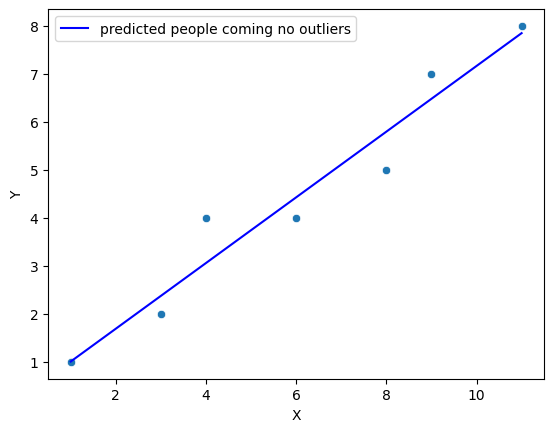

In [114]:
sns.scatterplot(x=party_attendance_no_outliers["X"],y=party_attendance_no_outliers["Y"])
plt.plot(party_attendance_no_outliers.X,party_attendance_no_outliers.prediction_attendance,c="blue",label="predicted people coming no outliers")
plt.legend();

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [118]:
results_attendance_no_outs = smf.ols("X ~ prediction_attendance", data = party_attendance_no_outliers).fit()
results_attendance_no_outs.summary()

C:\Users\mocid\miniconda3\envs\ironhack_5\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.189e+31
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.89e-77
Time:                        17:26:38   Log-Likelihood:                 226.53
No. Observations:                   7   AIC:                            -449.1
Df Residuals:                       5   BIC:                            -449.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.4725   2.11e-15  -2.24e+14      0.000      -0.473      -0.473
prediction_attendance     1.4615   4.24e-16   3.45e+15      0.000       1.462       1.462
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.574
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.661
Skew:                           0.720   Prob(JB):                        0.718
Kurtosis:                       2.562   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
results_attendance.summary()

C:\Users\mocid\miniconda3\envs\ironhack_5\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.512e+31
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.35e-94
Time:                        17:26:40   Log-Likelihood:                 261.82
No. Observations:                   8   AIC:                            -519.6
Df Residuals:                       6   BIC:                            -519.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.5179   1.14e-15   4.55e+14      0.000       0.518       0.518
prediction_attendance     1.1786   1.75e-16   6.72e+15      0.000       1.179       1.179
==============================================================================
Omnibus:                        2.013   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                1.170
Skew:                          -0.717   Prob(JB):                        0.557
Kurtosis:                       1.794   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
print("well, visually it looks like the second model, without the outlier has a better fit, but both the p_values and the R^Squared did not change and explain the model very well. The coefficients suggest that the second model is more realistic as in the first, almost by inviting no one you get for free one attendee due to the slope and intercept.")

well, visually it looks like the second model, without the outlier has a better fit, but both the p_values and the R^Squared did not change and explain the model very well. The coefficients suggest that the second model is more realistic as in the first, almost by inviting no one you get for free one attendee due to the slope and intercept.
